<a href="https://colab.research.google.com/github/reni-hristova/Classification-Fashion-MNIST/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"Import and rename libraries needed for all models"
import tensorflow as tf
import numpy as np

import math
import matplotlib.pyplot as plt

# Import Keras dataset

In [ ]:
# Import Fashion MNIST dataset from Keras 
(train_set, train_labels), (test_set, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualisation

In [ ]:
# Visualisation
fig, ax = plt.subplots(10,10)
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(10):
    t = train_set[train_labels==i,:,:][0:10,:,:]
    for j in range(10):
        ax[j,i].imshow(t[j,:,:], cmap=plt.cm.binary)
        ax[j,i].set_axis_off()
plt.savefig('mnist-10x10.pdf')

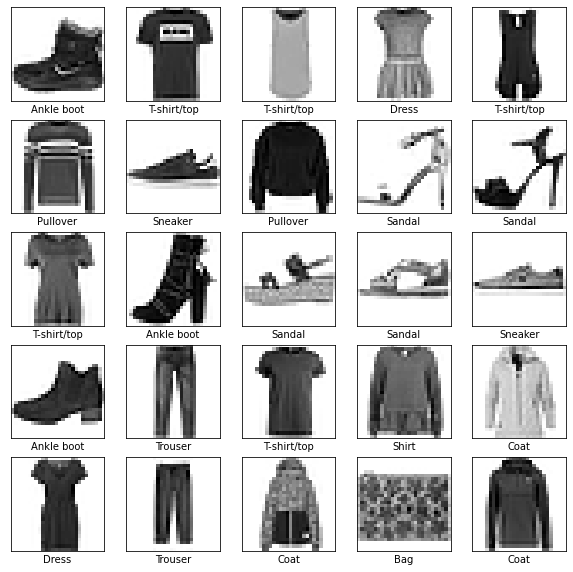

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

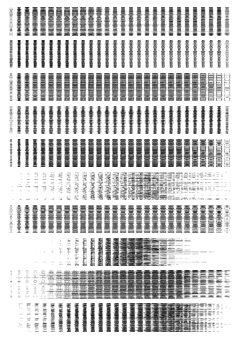

In [ ]:
fig, ax = plt.subplots(10,1,figsize=[4,6])
plt.subplots_adjust(wspace=0, hspace=0.1)
for i in range(10):
    t = np.random.permutation(train_set[train_labels==i,:,:])
    im = []
    for j in range(100):
        im.append(np.squeeze(np.reshape(t[j,:,:],(1,-1))))
    im = np.array(im)
    ax[i].imshow(np.array(im), cmap=plt.cm.binary)
    ax[i].set_axis_off()
plt.savefig('mnist-vectorised.pdf')

# Preprocessing

In [4]:
# Normalise the values in the images to be between 0 and 1 (Normally the range is 0, 255)
train_set = train_set / 255.0
test_set = test_set / 255.0

In [5]:
# Vectorise the data
test_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in test_set]))
train_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in train_set]))

In [6]:
from sklearn.decomposition import PCA

# Build a PCA model to retain 97% of the information
pca = PCA(.97)

# Fit the model to the data
pca.fit(train_set)

PCA(copy=True, iterated_power='auto', n_components=0.97, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
# Transform the data to reduce dimensionality using PCA 
train_set = pca.transform(train_set)
test_set = pca.transform(test_set)

# KNN
Optimise the number of neighbours (k) for this dataset and set the hyperparameter KNN_NEIGHBOURS to that k which achieves the highest accuracy score.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

best_k = 1
best_accuracy = -1

# Testing KNN with a k between 1 and 10
for i in range(1, 10):
  print("\nTesting k = ", i)

  # Create a classifier 
  classifier = KNeighborsClassifier(metric = 'euclidean', n_neighbors = i)
  classifier.fit(train_set, train_labels)

  # Make predictions on the test set 
  predicted_labels = classifier.predict(test_set)

  # If the accuracy is higher than the current best, update the highest accuracy and the best number of neighbours
  if accuracy_score(test_labels, predicted_labels) > best_accuracy:
    best_accuracy = accuracy_score(test_labels, predicted_labels)
    best_k = i

print("\nExecution finished. Accuracy is highest at ", best_accuracy," for k = ", best_k)

# Assign the k with the best accuracy to the hyperparameter.
KNN_NEIGHBOURS = best_k


Testing k =  1

Testing k =  2

Testing k =  3

Testing k =  4

Testing k =  5

Testing k =  6

Testing k =  7

Testing k =  8

Testing k =  9

Execution finished. Accuracy is highest at  0.8639  for k =  4


# Evaluation of the best model
Use SK Learn's Accuracy Score, Confusion Matrix and Classification Report to evaluate the optimised model.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Set hyperparameter for the number of neighbours (if you haven't ran the optimisation)
# KNN_NEIGHBOURS = 4

# Create the model with the optimised k
classifier = KNeighborsClassifier(metric = 'euclidean', n_neighbors = KNN_NEIGHBOURS)
classifier.fit(train_set, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, multilabel_confusion_matrix

# Predict labels for the test set
predicted_labels = classifier.predict(test_set)

# Evaluate the model
confusion_matrix = confusion_matrix(test_labels, predicted_labels)

print("\n Accuracy score\n", accuracy_score(test_labels, predicted_labels))
print("\n Confusion Matrix\n", confusion_matrix)
print("\n Classification Report\n", classification_report(test_labels, predicted_labels))


 Accuracy score
 0.8639

 Confusion Matrix
 [[880   0  18  15   3   1  77   1   5   0]
 [  8 971   1  12   4   0   3   0   1   0]
 [ 26   2 828  11  73   0  59   0   1   0]
 [ 43   7  15 876  24   0  32   0   3   0]
 [  3   1 146  27 754   0  65   0   4   0]
 [  2   0   0   0   0 893   1  55   0  49]
 [197   2 130  25  82   0 554   0  10   0]
 [  0   0   0   0   0   7   0 973   0  20]
 [  3   0   8   4   7   1  12   7 958   0]
 [  0   0   0   0   0   2   0  45   1 952]]

 Classification Report
               precision    recall  f1-score   support

 T-shirt/top       0.00      0.00      0.00         0
     Trouser       0.00      0.00      0.00         0
    Pullover       0.00      0.00      0.00         0
       Dress       0.00      0.00      0.00         0
        Coat       0.00      0.00      0.00         0
      Sandal       0.00      0.00      0.00         0
       Shirt       0.00      0.00      0.00         0
     Sneaker       0.00      0.00      0.00         0
         Bag

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to 

0.8639


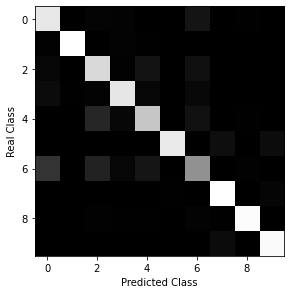

In [23]:
# Visualise the Confusion Matrix
plt.imshow(confusion_matrix,cmap='gray')
plt.tight_layout()
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
print(sum(confusion_matrix.diagonal())/sum(sum(confusion_matrix)))